# Лабораторна робота 

Намалювати крижинку Коха з можливістю вибору рівня рекурсії.

In [6]:
import numpy as np 
import pandas as pd 

# Створення кривої

Генеруємо криву Коха, фрактальну криву, яка створюється за допомогою рекурсивного поділу відрізка лінії на три частини, замінюючи середній сегмент рівностороннім трикутником без бази. Функція koch рекурсивно застосовує цей процес поділу для кожного сегмента лінії, використовуючи параметр n для визначення глибини рекурсії. Початковий відрізок задається точками a і b. Кут th визначає нахил для створення вершини трикутника. В результаті цих операцій генерується список точок points, які потім використовуються для створення графічного представлення кривої за допомогою matplotlib, де x і y — це координати цих точок на графіку.





(-5.0, 105.0, -1.4433756729740645, 30.31088913245535)

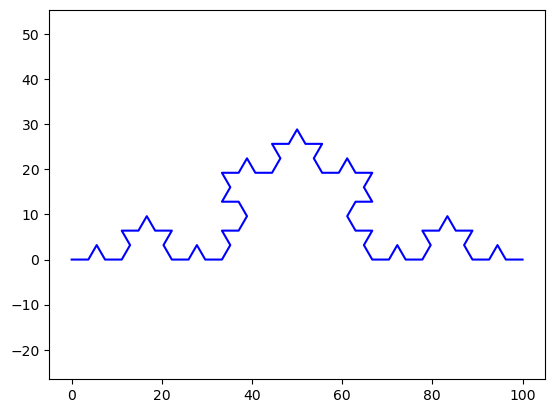

In [10]:
import math
import matplotlib.pyplot as plt

th = math.pi * 60 / 180 # градусів до радіану
a = (0.0, 0.0) #старт
b = (100.0, 0.0) #фініш
n = 3 #кількість повторів
points = [a]

# Зробити функцію, яка робить координати
def koch(a, b, n):
    if n == 0:
        return
    s = (a[0] + (b[0] - a[0]) / 3, a[1] + (b[1] - a[1]) / 3)
    t = (a[0] + (b[0] - a[0]) * 2 / 3, a[1] + (b[1] - a[1]) * 2 / 3)
    u = (s[0] + (t[0] - s[0]) * math.cos(th) - (t[1] - s[1]) * math.sin(th),
        s[1] + (t[0] - s[0]) * math.sin(th) + (t[1] - s [1]) * math.cos(th)
        )
    
    koch(a, s, n-1)
    points.append(s)
    koch(s, u, n-1)
    points.append(u)
    koch(u, t, n-1)
    points.append(t)
    koch(t, b, n-1)

# Зробити дані для графіка
koch(a, b, n)
points.append(b)

x = [points[i][0] for i in range(len(points))] #make data for x axis
y = [points[i][1] for i in range(len(points))] #make data for y axis


plt.plot(x, y, color="blue")
plt.axis("equal") 

# Створення кривої

Генеруємо криву Коха, фрактальну криву, яка створюється за допомогою рекурсивного поділу відрізка лінії на три частини, замінюючи середній сегмент рівностороннім трикутником без бази. Функція koch рекурсивно застосовує цей процес поділу для кожного сегмента лінії, використовуючи параметр n для визначення глибини рекурсії. Початковий відрізок задається точками a і b. Кут th визначає нахил для створення вершини трикутника. В результаті цих операцій генерується список точок points, які потім використовуються для створення графічного представлення кривої за допомогою matplotlib, де x і y — це координати цих точок на графіку.





In [8]:
# Подивіться на анімацію, яка показує, як змінюється крива Коха шляхом додавання кількості повторень
from matplotlib import animation
from IPython.display import HTML

fig = plt.figure()
ims = [] 

for n in range(7):
    n += 1
    points = [a] 
    
    koch(a, b, n)
    points.append(b)
    
    x = [points[i][0] for i in range(len(points))]
    y = [points[i][1] for i in range(len(points))]
    
    img = plt.plot(x, y, color="blue")
    plt.axis("equal")
    ims.append(img) 

plt.close() 


ani = animation.ArtistAnimation(fig, ims, interval=500)
HTML(ani.to_jshtml())

**Ми можемо побачити після повторення (у 5 разів більше повторень), відмінності цифр виглядають меншими.**

(<matplotlib.patches.Rectangle at 0x14ffe294350>,
 (<matplotlib.patches.ConnectionPatch at 0x14ffe35db10>,
  <matplotlib.patches.ConnectionPatch at 0x14ffe42a610>))

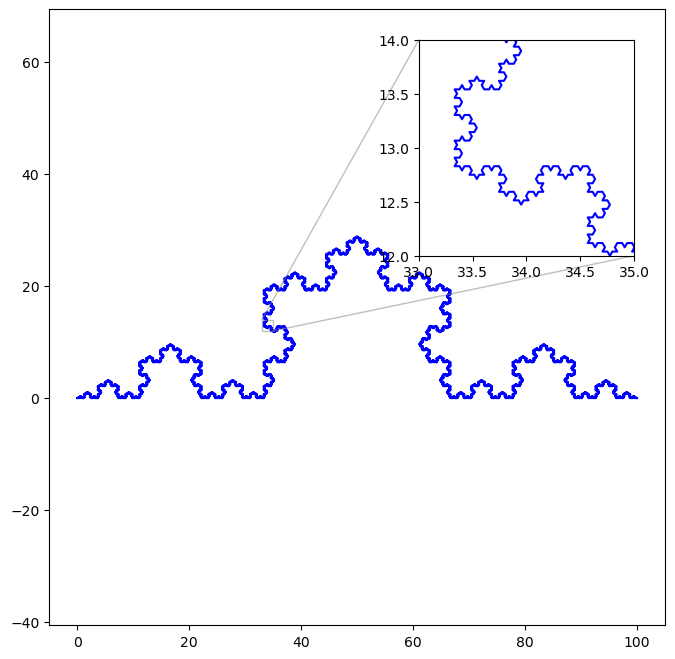

In [9]:
# Давайте подивимося на збільшене зображення на фракталі
n = 7 
points = [a]

koch(a, b, n)
points.append(b)
x = [points[i][0] for i in range(len(points))]
y = [points[i][1] for i in range(len(points))]

fig, ax = plt.subplots(figsize=[12, 8])
ax.plot(x, y, color="blue")
ax.axis("equal")


axins = ax.inset_axes([0.6, 0.6, 0.35, 0.35]) 
axins.plot(x, y, color="blue") 

x1, x2, y1, y2 = 33, 35, 12, 14 
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
ax.set_box_aspect(1) 
ax.indicate_inset_zoom(axins) 

**У збільшеному зображенні ми можемо знайти фрактал із низькою або середньою кількістю повторень, а збільшене зображення схоже на оригінальне не збільшене зображення.**

(-5.000000000000004, 105.00000000000003, -34.64101615137754, 92.37604307034012)

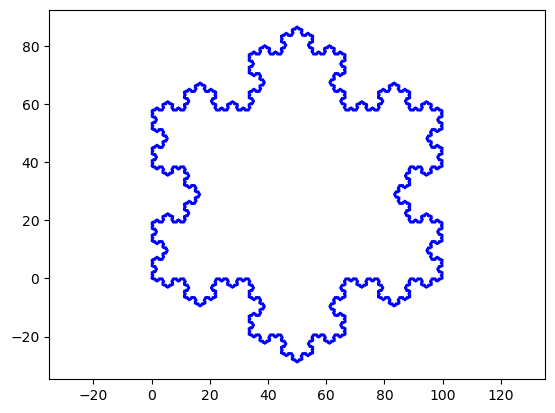

In [5]:
# Робимо крижинку
a = (0.0, 0.0)
b = (50.0, 100.0 * math.sin(th))
c = (100.0, 0.0)
n = 5

points = [a]
koch(a, b, n)
points.append(b)
koch(b, c, n)
points.append(c)
koch(c, a, n)

x = [points[i][0] for i in range(len(points))]
y = [points[i][1] for i in range(len(points))]
plt.plot(x, y, color="blue")
plt.axis("equal")